<a href="https://colab.research.google.com/github/ritzi12/Student-Score-Prediction-Regression-Using-R/blob/main/Task1_SupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPARKS FOUNDATION - DATA SCIENCE AND BUSINESS ANALYTICS 
## TASK 1 
### Supervised ML -Beginner
AUTHOR : RITIKA GUPTA

OBJECTIVE: Prediction of Student score based on No. of study hours/week

LANGUAGE : R 

TOOL :  Google Colab (with R kernel)



In [16]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.1                         
year           2021                        
month          08                          
day            10                          
svn rev        80725                       
language       R                           
version.string R version 4.1.1 (2021-08-10)
nickname       Kick Things                 

## Load Packages

In [17]:
#load packages
pack=c('tidyverse')
library(pack,character.only=T)
library(repr)

# To adjust display of plot in Jupyter notebook for R
options(repr.plot.width=12, repr.plot.height=6)

## Load Dataset 

In [18]:
#load dataset
train=read.csv("student_scores.csv")

cat("Dimension of train dataset:",dim(train),"\n \n")

summary(train)

Dimension of train dataset: 25 2 
 


     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

## Exploratory Data Analysis

For performing Linear regression we consider certain assumptions regarding the dataset.These assumptions must be checked in order to model our dataset correctly in Linear Regression Model to gain a meaningful prediction: 

### Assumptions of Regression
1.	The dataset must have some **linear relationship**.
A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2.	**Multivariate normality** - the dataset variables must be statistically Normally Distributed (i.e. resembling a Bell Curve)
3.	It must have **no or little multicollinearity** - this means the independent variables must not be too highly correlated with each other. This can be tested with a Correlation matrix and other tests
4.	**No auto-correlation** - Autocorrelation occurs when the residuals are not independent from each other. For instance, this typically occurs in stock prices, where the price is not independent from the previous price.
5.	**Homoscedasticity** - meaning that the residuals are equally distributed across the regression line i.e. above and below the regression line and the variance of the residuals should be constant i.e. the same for all predicted scores along the regression line.


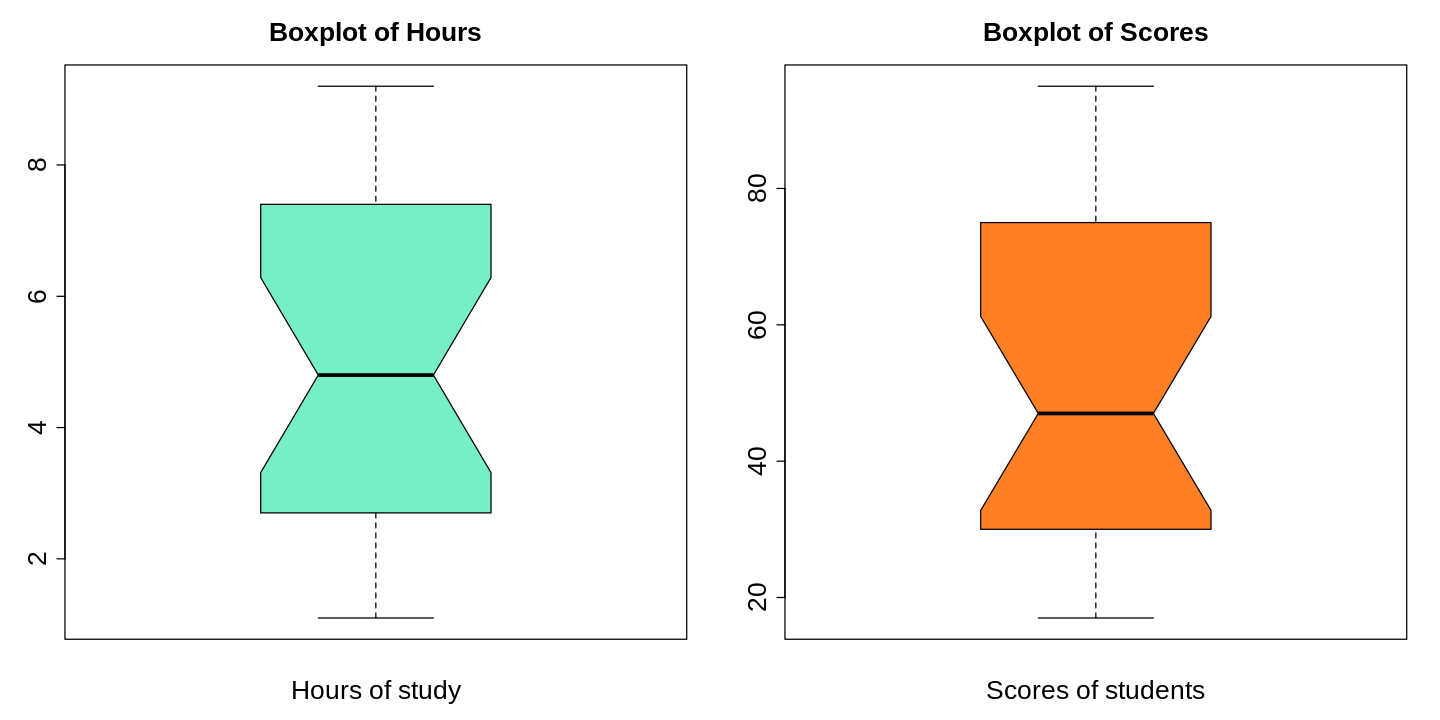

In [19]:
#distribution of features
layout(matrix(c(1,1,2,2),1,4,byrow=TRUE))
boxplot(train$Hours,col = 'aquamarine2',xlab='Hours of study',notch = T,main='Boxplot of Hours',cex.lab=2,cex.main=2,cex.axis=2)
boxplot(train$Scores,col = 'chocolate1',xlab='Scores of students',notch = T,main='Boxplot of Scores',cex.lab=2,cex.main=2,cex.axis=2)

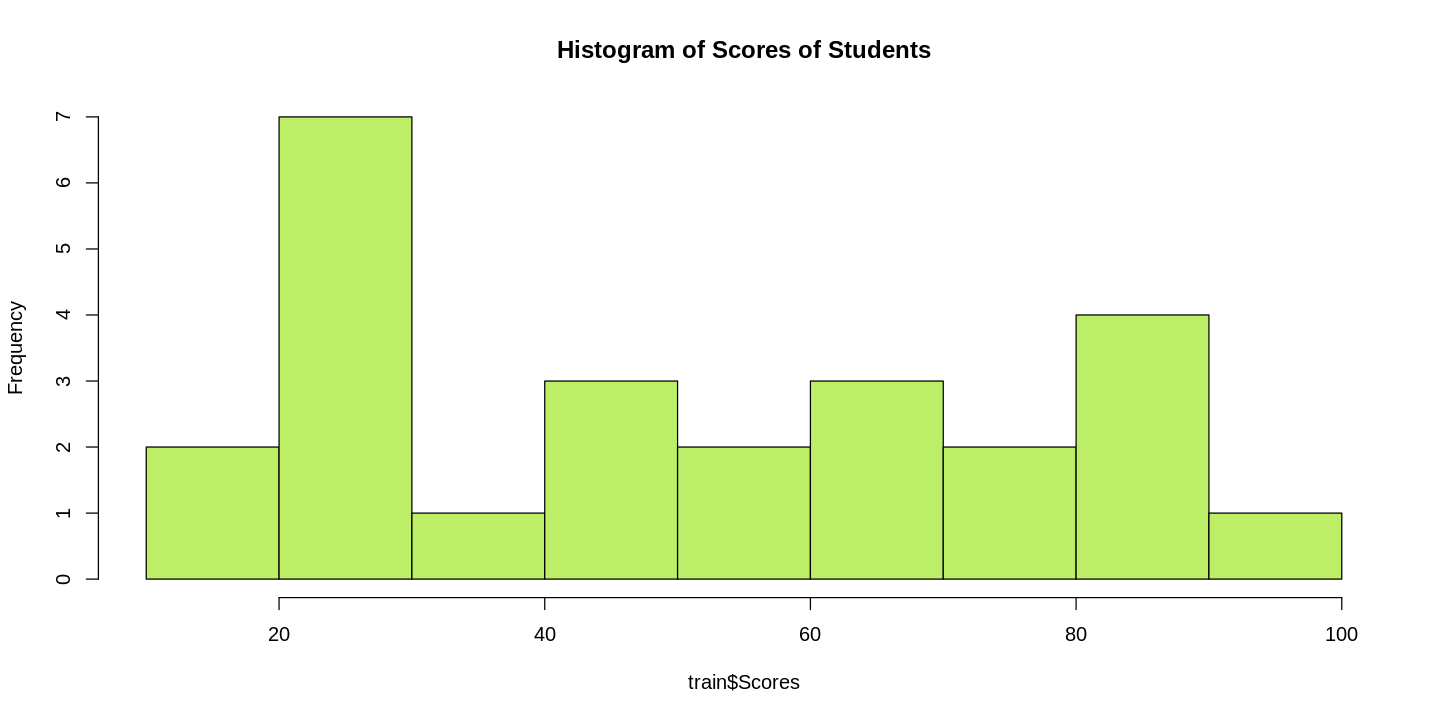

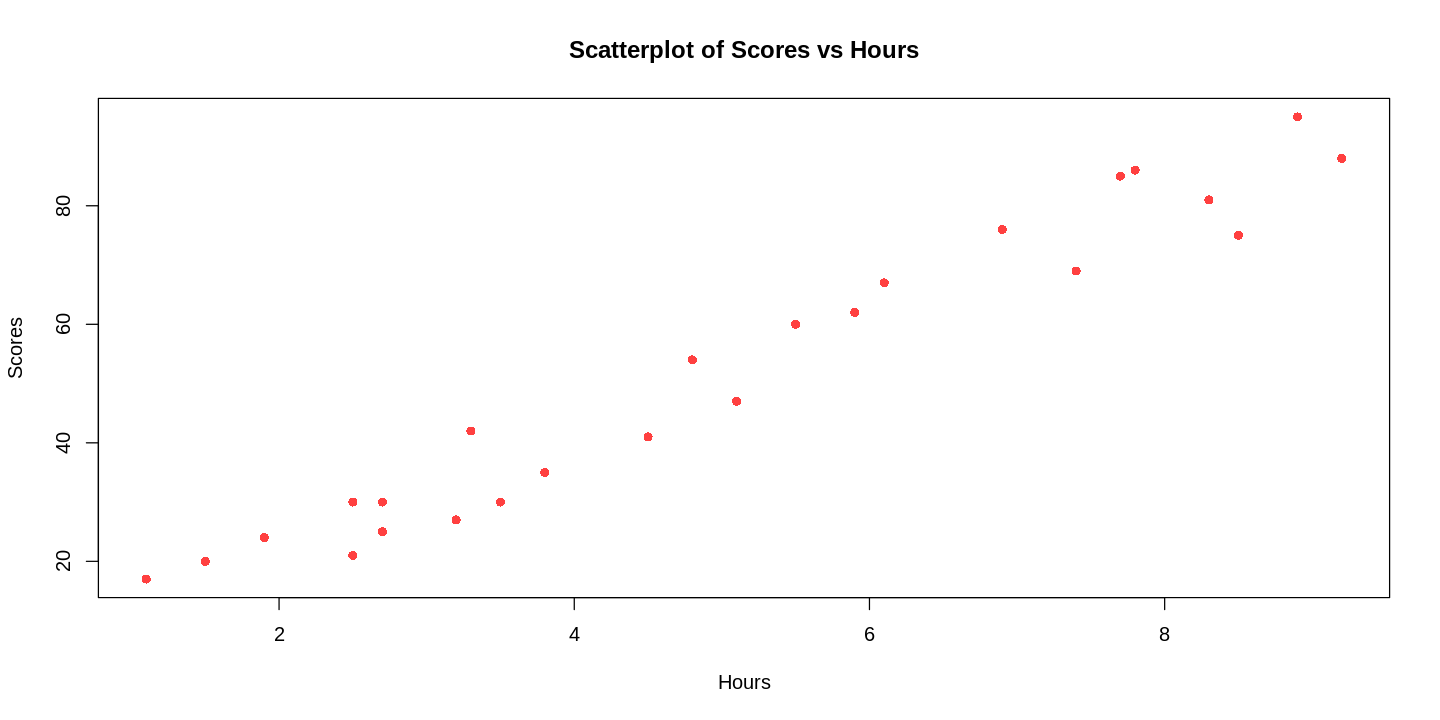

In [20]:
#Distribution of Scores
hist(train$Scores, main = 'Histogram of Scores of Students',col='darkolivegreen2',breaks = 6)
#Correlation plot of Hours vs Scores
plot(train$Hours,train$Scores,col="brown1",pch = 16,cex=1,main='Scatterplot of Scores vs Hours',xlab='Hours',ylab='Scores')

From above plots we can conclude our predictor and target variable have a linear relationship based on scatterplot.Also using histogram we can see it is almost normally distributed with right skewed . 

## REGRESSION MODEL BUILDING

In [21]:
#model building

model_score=lm(Scores~Hours,train)
summary(model_score)



Call:
lm(formula = Scores ~ Hours, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


## MODEL OUTPUT ANALYSIS



### Residual Plot Analysis

In the below residual plot we can see the error/residuals don't form any pattern and randomly distributed .This means our assumption of Homoscedasticity holds.

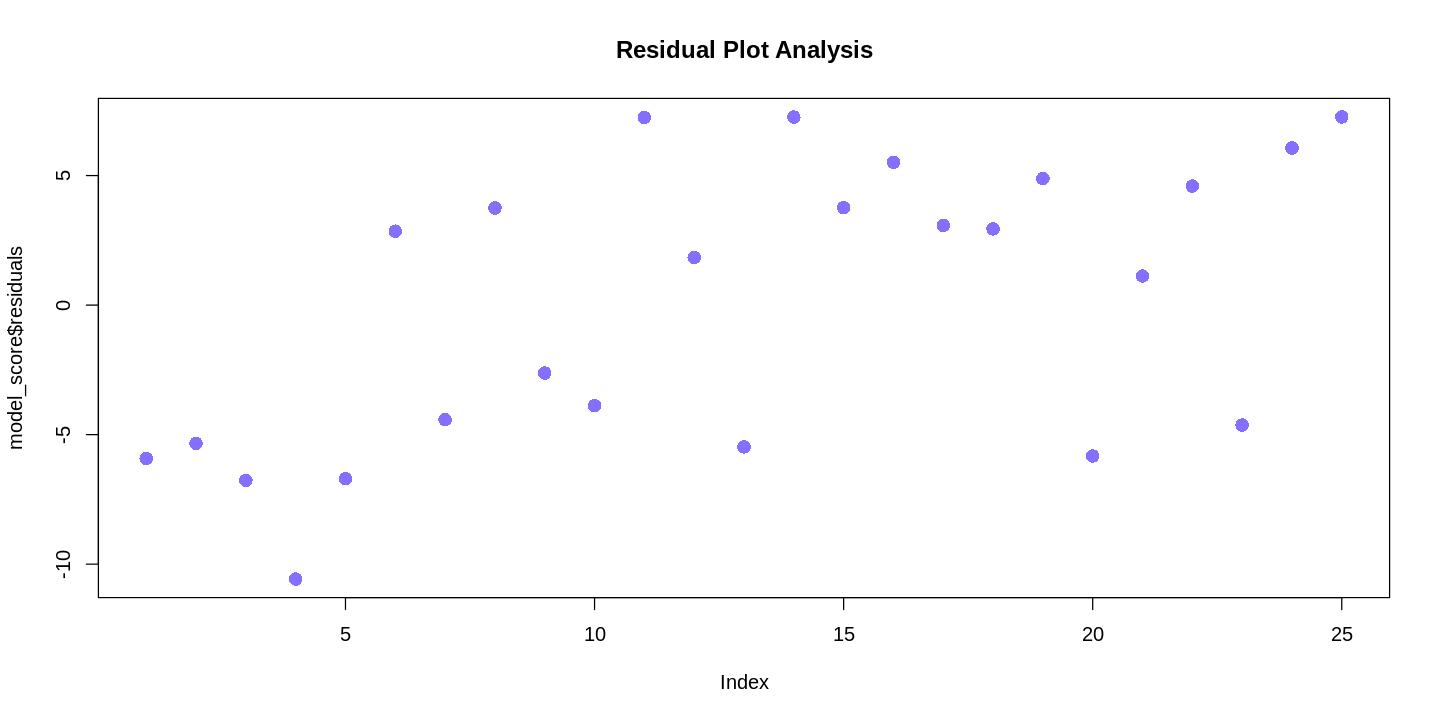

In [22]:
#Residual plot analysis
plot(model_score$residuals,pch=16,col='lightslateblue',cex=1.5,main='Residual Plot Analysis')

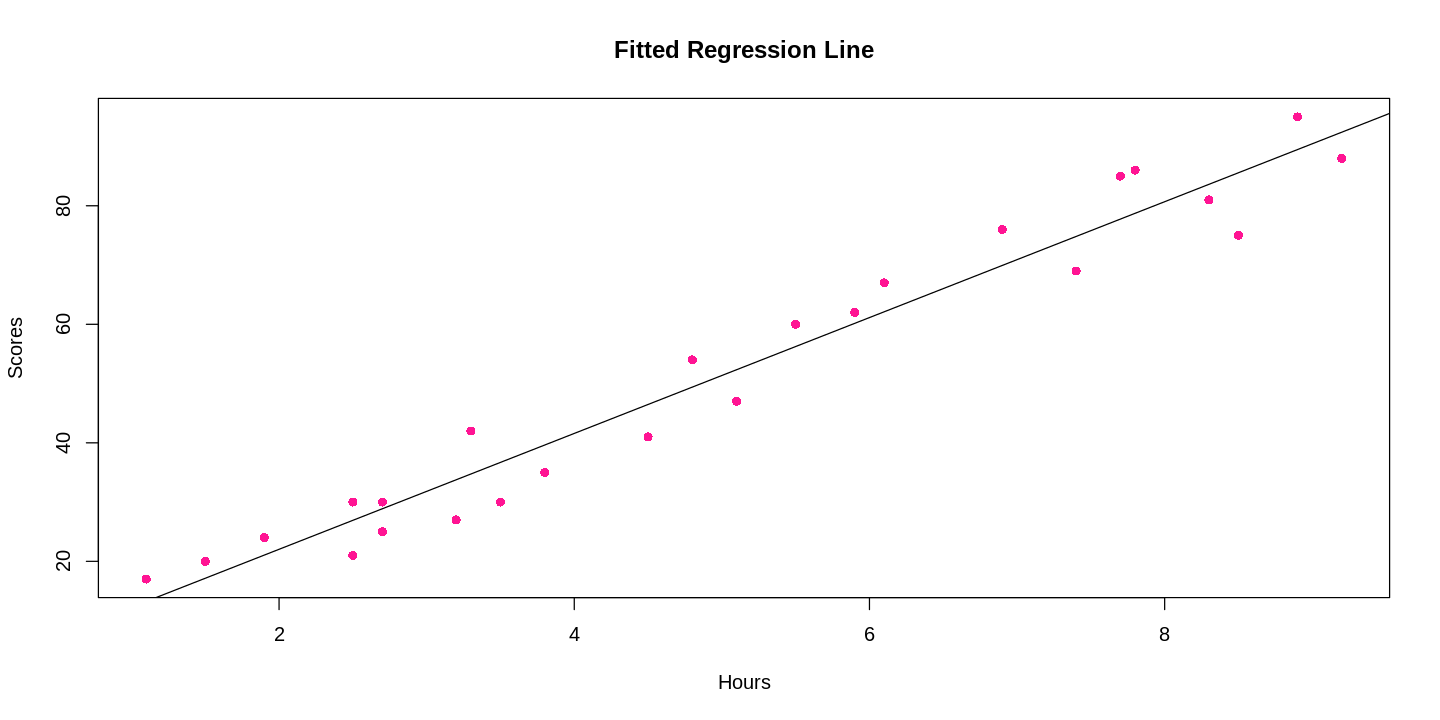

In [23]:
plot(train$Hours,train$Scores,col="deeppink",pch = 16,cex=1,main='Fitted Regression Line',xlab='Hours',ylab='Scores')
abline(lm(Scores~Hours,train))

## Prediction of Test Data

In [24]:
test=data.frame(Hours=9.25)

test_score= predict(model_score,test)

In [25]:
#Ouput Score for Hours=9.25
test_score

1 
92.90985